In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "C:\\Users\\91897\\Downloads\\FuelConsumptionCo2.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


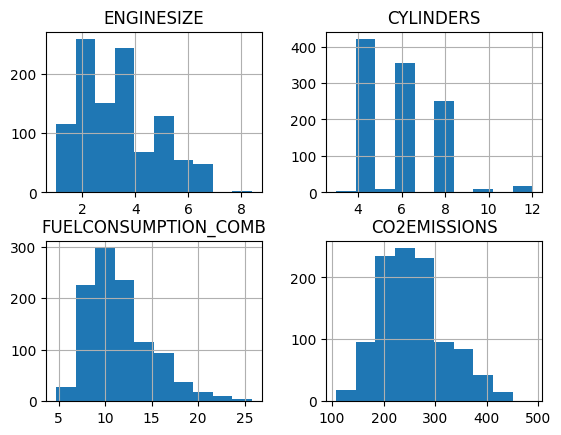

In [6]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

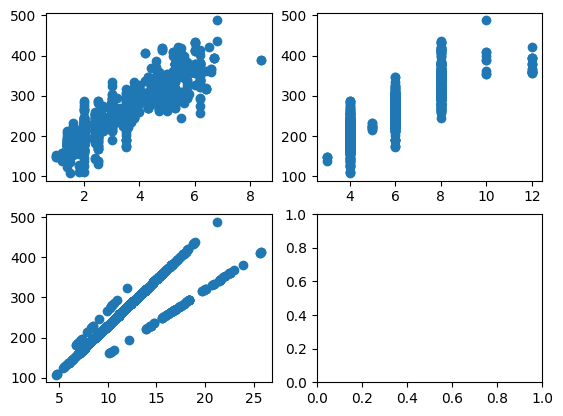

In [7]:
fig,ax = plt.subplots(2,2)
ax[0,0].scatter(cdf['ENGINESIZE'],cdf.CO2EMISSIONS)
ax[0,1].scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS)
ax[1,0].scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS)

In [8]:
for i in cdf.columns:
    print(i)

ENGINESIZE
CYLINDERS
FUELCONSUMPTION_COMB
CO2EMISSIONS


In [12]:
m= np.random.rand(len(cdf))<0.8
train = cdf[m]
test = cdf[~m]

In [13]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
7,3.7,6,11.1,255
10,2.4,4,9.8,225
20,2.0,4,10.0,230
21,2.0,4,9.3,214
31,4.0,8,11.3,260
...,...,...,...,...
1044,1.8,4,8.6,198
1050,3.6,6,12.1,278
1056,2.5,5,9.7,223
1059,3.2,6,10.2,235


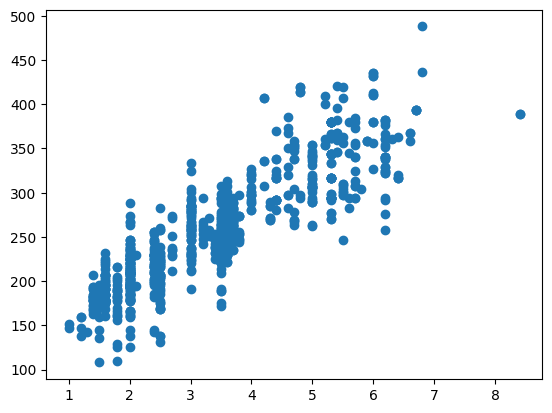

In [14]:
plt.scatter(train[['ENGINESIZE']],train['CO2EMISSIONS'])

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#reg.fit(train_cdf[['ENGINESIZE']],train_cdf[['CO2EMISSIONS']])
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x,train_y)

#coefficients
print("Coefficients: ",reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [[38.90743197]]
Intercept:  [125.5919516]


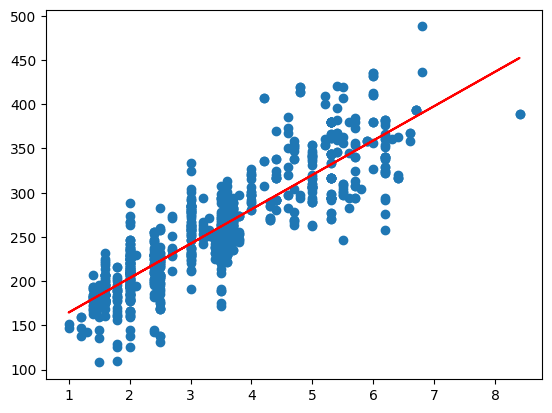

In [19]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.plot(train_x,reg.coef_[0][0]*train_x+reg.intercept_,'r')

In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: ", np.mean(np.abs(test_y_ - test_y)))
print("Residual sum of squares(MSE): ", np.mean((test_y_ - test_y)**2))
print("R2-score: ",r2_score(test_y_,test_y))


Mean absolute error:  22.27081896310336
Residual sum of squares(MSE):  845.1129962195852
R2-score:  0.6834748163467091


### FUELCONSUMPTION_COMB VS CO2EMISSIONS

In [22]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])

In [23]:
reg1 = LinearRegression()
reg1.fit(train_x,train_y)

LinearRegression()

In [24]:
test_y_ = reg1.predict(test_x)

In [25]:
print("Mean absolute error: ", np.mean(np.abs(test_y_ - test_y)))

Mean absolute error:  19.52486631127928
